<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2'

In [4]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.899697,81.266071,49.553998,-43.144381,196.575386,239.738237,-43.162851
1,0.0,1.0,64.655419,61.187116,71.995787,-18.124024,189.714299,209.702368,-19.988070
2,0.0,2.0,51.901521,39.913970,32.263277,-80.306905,53.771863,134.282856,-80.510993
3,0.0,3.0,60.095701,54.717036,37.666278,-25.441807,137.037208,164.087717,-27.050509
4,0.0,4.0,34.458797,63.439529,61.968696,59.038738,228.905761,177.352615,51.553146
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.669612,38.521029,43.050862,-10.637506,151.603998,157.137126,-5.533128
249996,999.0,246.0,80.184370,44.490370,61.925228,-25.919326,170.680642,193.178168,-22.497526
249997,999.0,247.0,80.149520,21.932121,28.065477,-4.071594,136.075525,126.825227,9.250298
249998,999.0,248.0,77.140148,21.288186,95.826507,25.566488,229.821329,204.107561,25.713768


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.899697,81.266071,49.553998,-43.144381,196.575386,239.738237,-43.162851
1,0.0,1.0,64.655419,61.187116,71.995787,-18.124024,189.714299,209.702368,-19.988070
2,0.0,2.0,51.901521,39.913970,32.263277,-80.306905,53.771863,134.282856,-80.510993
3,0.0,3.0,60.095701,54.717036,37.666278,-25.441807,137.037208,164.087717,-27.050509
4,0.0,4.0,34.458797,63.439529,61.968696,59.038738,228.905761,177.352615,51.553146
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.669612,38.521029,43.050862,-10.637506,151.603998,157.137126,-5.533128
249996,999.0,246.0,80.184370,44.490370,61.925228,-25.919326,170.680642,193.178168,-22.497526
249997,999.0,247.0,80.149520,21.932121,28.065477,-4.071594,136.075525,126.825227,9.250298
249998,999.0,248.0,77.140148,21.288186,95.826507,25.566488,229.821329,204.107561,25.713768


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    98.899697  81.266071  49.553998  ...  196.575386  239.738237 -43.162851
      1.0    64.655419  61.187116  71.995787  ...  189.714299  209.702368 -19.988070
      2.0    51.901521  39.913970  32.263277  ...   53.771863  134.282856 -80.510993
      3.0    60.095701  54.717036  37.666278  ...  137.037208  164.087717 -27.050509
      4.0    34.458797  63.439529  61.968696  ...  228.905761  177.352615  51.553146
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  70.669612  38.521029  43.050862  ...  151.603998  157.137126  -5.533128
      246.0  80.184370  44.490370  61.925228  ...  170.680642  193.178168 -22.497526
      247.0  80.149520  21.932121  28.065477  ...  136.075525  126.825227   9.250298
      248.0  77.140148  21.288186  95.826507  ...  229.821329  204.107561  25.713768
      249.0  87.157367  91.972602  45.416941  ...  197.893107  233.890602 -35.997495

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    98.899697  81.266071  49.553998  ...  196.575386  239.738237 -43.162851
      1.0    64.655419  61.187116  71.995787  ...  189.714299  209.702368 -19.988070
      2.0    51.901521  39.913970  32.263277  ...   53.771863  134.282856 -80.510993
      3.0    60.095701  54.717036  37.666278  ...  137.037208  164.087717 -27.050509
      4.0    34.458797  63.439529  61.968696  ...  228.905761  177.352615  51.553146
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  70.669612  38.521029  43.050862  ...  151.603998  157.137126  -5.533128
      246.0  80.184370  44.490370  61.925228  ...  170.680642  193.178168 -22.497526
      247.0  80.149520  21.932121  28.065477  ...  136.075525  126.825227   9.250298
      248.0  77.140148  21.288186  95.826507  ...  229.821329  204.107561  25.713768
      249.0  87.157367  91.972602  45.416941  ...  197.893107  233.890602 -35.997495

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.899697,81.266071,49.553998,-43.144381,196.575386,239.738237,-43.162851
1,0.0,1.0,64.655419,61.187116,71.995787,-18.124024,189.714299,209.702368,-19.988070
2,0.0,2.0,51.901521,39.913970,32.263277,-80.306905,53.771863,134.282856,-80.510993
3,0.0,3.0,60.095701,54.717036,37.666278,-25.441807,137.037208,164.087717,-27.050509
4,0.0,4.0,34.458797,63.439529,61.968696,59.038738,228.905761,177.352615,51.553146
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,70.669612,38.521029,43.050862,-10.637506,151.603998,157.137126,-5.533128
249996,999.0,246.0,80.184370,44.490370,61.925228,-25.919326,170.680642,193.178168,-22.497526
249997,999.0,247.0,80.149520,21.932121,28.065477,-4.071594,136.075525,126.825227,9.250298
249998,999.0,248.0,77.140148,21.288186,95.826507,25.566488,229.821329,204.107561,25.713768


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    98.899697  81.266071  49.553998  ...  196.575386  239.738237 -43.162851
      1.0    64.655419  61.187116  71.995787  ...  189.714299  209.702368 -19.988070
      2.0    51.901521  39.913970  32.263277  ...   53.771863  134.282856 -80.510993
      3.0    60.095701  54.717036  37.666278  ...  137.037208  164.087717 -27.050509
      4.0    34.458797  63.439529  61.968696  ...  228.905761  177.352615  51.553146
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  70.669612  38.521029  43.050862  ...  151.603998  157.137126  -5.533128
      246.0  80.184370  44.490370  61.925228  ...  170.680642  193.178168 -22.497526
      247.0  80.149520  21.932121  28.065477  ...  136.075525  126.825227   9.250298
      248.0  77.140148  21.288186  95.826507  ...  229.821329  204.107561  25.713768
      249.0  87.157367  91.972602  45.416941  ...  197.893107  233.890602 -35.997495

[250000 rows x 7 columns]

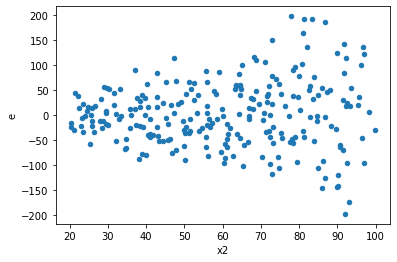

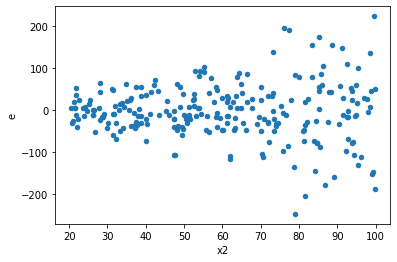

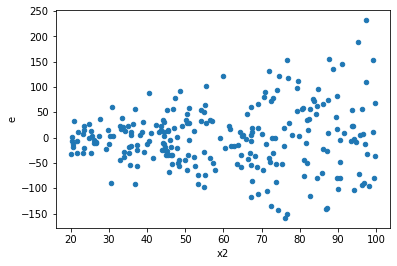

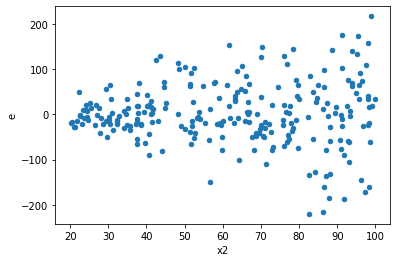

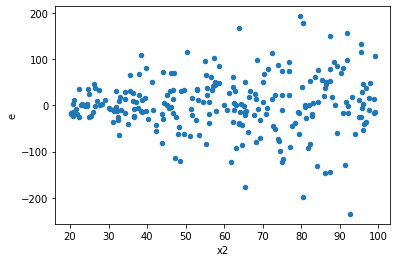

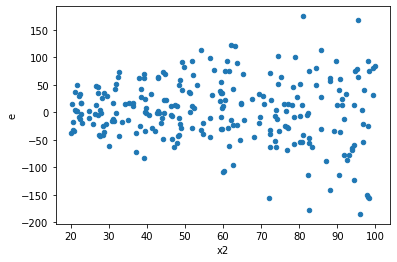

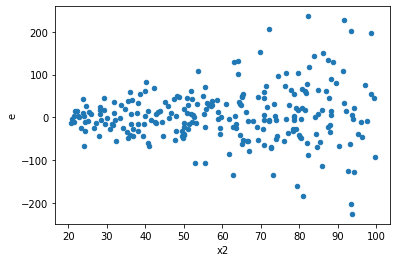

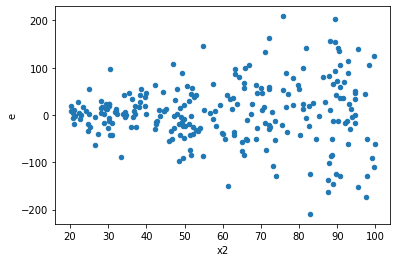

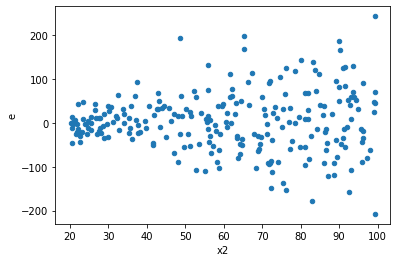

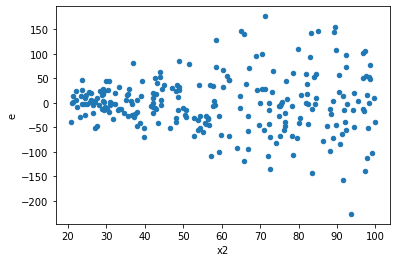

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,728692.9743135279,173952.42750228522,7590.551815765916,1812.0044531488045,4.189035961018452,1.3211209903829513e-11,0.9999999999933944,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,807523.0500654494,127675.92008002415,8411.698438181766,1329.9575008335848,6.324787395769802,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,678121.748511468,112022.16933066951,7063.768213661125,1166.897597194474,6.053460244193033,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,757317.1137329093,175825.61495257067,7888.719934717806,1831.516822422611,4.307205829692092,5.657030399675023e-12,0.9999999999971715,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,546089.2238548951,148203.01753207177,5688.429415155158,1543.7814326257476,3.684737550885015,5.686149329164891e-10,0.9999999997156925,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,507900.577261767,120515.6998449343,5290.631013143407,1255.3718733847322,4.214393460065991,1.1001199951010676e-11,0.9999999999944994,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,748619.238713878,103030.61491566723,7798.117069936229,1073.2355720382004,7.265988263067622,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,744009.5065185748,122652.0102157515,7750.099026235154,1277.6251064140781,6.066019669875952,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,709740.964413843,161047.39874969315,7393.135045977531,1677.5770703093037,4.407031531859469,2.7897684162780934e-12,0.9999999999986051,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,728692.9743135279,173952.42750228522,7590.551815765916,1812.0044531488045,4.189035961018452,1.3211209903829513e-11,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,807523.0500654494,127675.92008002415,8411.698438181766,1329.9575008335848,6.324787395769802,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,678121.748511468,112022.16933066951,7063.768213661125,1166.897597194474,6.053460244193033,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,757317.1137329093,175825.61495257067,7888.719934717806,1831.516822422611,4.307205829692092,5.657030399675023e-12,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,546089.2238548951,148203.01753207177,5688.429415155158,1543.7814326257476,3.684737550885015,5.686149329164891e-10,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,507900.577261767,120515.6998449343,5290.631013143407,1255.3718733847322,4.214393460065991,1.1001199951010676e-11,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,748619.238713878,103030.61491566723,7798.117069936229,1073.2355720382004,7.265988263067622,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,744009.5065185748,122652.0102157515,7750.099026235154,1277.6251064140781,6.066019669875952,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,709740.964413843,161047.39874969315,7393.135045977531,1677.5770703093037,4.407031531859469,2.7897684162780934e-12,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64